In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

sns.set_theme(style="whitegrid")

In [2]:
train_df = pd.read_csv("../data/train.csv", date_parser="Date", dtype={"StateHoliday" : str})
store = pd.read_csv("../data/store.csv")

In [3]:
train_df = train_df[train_df['Open']==1].copy()

In [4]:
train_df = train_df.merge(
    store,
    how="left",
    on = "Store",
)

In [5]:
print(len(train_df))
train_df.head()

844392


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train_df.isnull().mean()

Store                        0.000000
DayOfWeek                    0.000000
Date                         0.000000
Sales                        0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002589
CompetitionOpenSinceMonth    0.318121
CompetitionOpenSinceYear     0.318121
Promo2                       0.000000
Promo2SinceWeek              0.501316
Promo2SinceYear              0.501316
PromoInterval                0.501316
dtype: float64

In [7]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [8]:
split_date(train_df)
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [9]:
def comp_months(df):
  df['CompetitionAge'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionAge'] = df['CompetitionAge'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [10]:
comp_months(train_df)
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionAge
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0


In [11]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Age'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Age'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Age'] = df['Promo2Age'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Applied'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [12]:
promo_cols(train_df)
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionAge,Promo2Age,IsPromo2Applied
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0


In [13]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionAge', 'Promo2Age', 'IsPromo2Applied'],
      dtype='object')

In [14]:
train_df.to_csv("../data/train_new.csv", index=False)

In [32]:
features = ['Store', 'DayOfWeek', 'Day', 'Month', 'WeekOfYear', 'Year', 'Promo', 'StateHoliday', \
    'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionAge', \
    'IsPromo2Applied'
]

numeric_feats = ['Store', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo', 'SchoolHoliday', 'CompetitionDistance', \
    'CompetitionAge', 'IsPromo2Applied'    
]

categorical_feats = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']


In [33]:
inputs = train_df[features].copy()
target = train_df['Sales'].copy()

## 2. Modelisation

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    inputs, target, test_size=1/3, random_state=12
)

print("Training data length : ", len(X_train))
print("Test data length : ", len(X_test))

Training data length :  562928
Test data length :  281464


### 2.1. Preprocessing

#### 2.1.1. Numeric features

In [36]:
X_train[numeric_feats].isna().sum()

Store                     0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
Promo                     0
SchoolHoliday             0
CompetitionDistance    1478
CompetitionAge            0
IsPromo2Applied           0
dtype: int64

In [37]:
X_test[numeric_feats].isna().sum()

Store                    0
Day                      0
Month                    0
Year                     0
WeekOfYear               0
Promo                    0
SchoolHoliday            0
CompetitionDistance    708
CompetitionAge           0
IsPromo2Applied          0
dtype: int64

In [38]:
max_distance = X_train.CompetitionDistance.max()
max_distance

75860.0

In [39]:
X_train['CompetitionDistance'].fillna(max_distance * 10, inplace=True)
X_test['CompetitionDistance'].fillna(max_distance * 10, inplace=True)

/Users/kevinab/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [40]:
X_train[numeric_feats].isna().sum()

Store                  0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionAge         0
IsPromo2Applied        0
dtype: int64

In [41]:
X_test[numeric_feats].isna().sum()

Store                  0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionAge         0
IsPromo2Applied        0
dtype: int64

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])

<ipython-input-43-5b7f95bf4d5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
/Users/kevinab/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-43-5b7f95bf4d5f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [44]:
X_train.head()

,Store,DayOfWeek,Day,Month,WeekOfYear,Year,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionAge,IsPromo2Applied
458589,0.846499,5,0.666667,0.090909,0.137255,0.5,1.0,0,0.0,c,a,0.002175,0.000000,0.0
611293,0.358169,1,0.266667,0.727273,0.705882,0.0,1.0,0,0.0,a,a,0.000066,0.076479,0.0
507971,0.365350,1,0.966667,1.000000,0.000000,0.0,0.0,0,1.0,c,a,0.002030,0.000000,0.0
407542,0.137343,2,0.466667,0.272727,0.294118,0.5,1.0,0,1.0,d,c,0.021619,0.000000,0.0
565854,0.817774,1,0.900000,0.818182,0.843137,0.0,0.0,0,0.0,c,c,0.004060,0.029582,0.0


<AxesSubplot:>

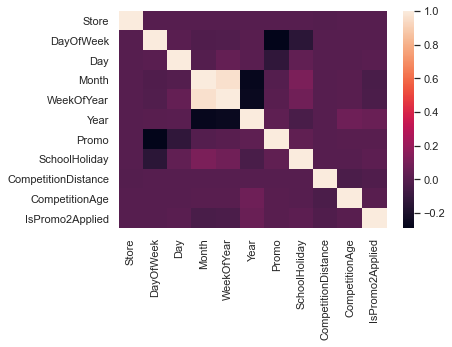

In [45]:
sns.heatmap(X_train.corr())

#### 2.2.2. Categorical Features